# Individual assignment 1： Planning Stage: Data Description & Exploratory Data Analysis and Visualization

In [1]:
library(broom)
library(latex2exp)
library(tidymodels)
library(repr)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(tidyverse)
library(modelr)
library(infer)
library(cowplot)
library(GGally)
library(tidyverse)
library(patchwork)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following objects are masked from ‘package:yardstick’:

    mcc, rmse


The following object is masked from ‘pa

## Data Description
**Number of observations**: 34

**Number of variables**: 1470


### Summary of Variables
List below are all the variables included in the dataset, along with their types:

**Age**: Continuous Variable - Age of the employee.

**Attrition**: Categorical Variable - Whether the employee has left the company ("Yes" or "No").

**BusinessTravel**: Categorical Variable - Frequency of business travel (e.g., "Travel_Rarely", "Travel_Frequently").

**DailyRate**: Continuous Variable - Daily rate of the employee.

**Department**: Categorical Variable - Department where the employee works (e.g., "Sales", "Research & Development").

**DistanceFromHome**: Continuous Variable - Distance between employee’s residence and office.

**Education**: Continuous Variable - Level of education (values from 1 to 5).

**EducationField**: Categorical Variable - Field of education (e.g., "Life Sciences", "Medical").

**EmployeeCount**: Continuous Variable - Employee count (always 1, serves no purpose in modeling).

**EmployeeNumber**: Continuous Variable - Unique identifier for the employee.

**EnvironmentSatisfaction**: Continuous Variable - Level of satisfaction with the work environment (values from 1 to 4).

**Gender**: Categorical Variable - Gender of the employee ("Male" or "Female").

**HourlyRate**: Continuous Variable - Hourly rate of the employee.

**JobInvolvement**: Continuous Variable - Level of job involvement (values from 1 to 4).

**JobLevel**: Continuous Variable - Job level within the organization.

**JobRole**: Categorical Variable - Role of the employee (e.g., "Sales Executive", "Research Scientist").

**JobSatisfaction**: Continuous Variable - Job satisfaction level (values from 1 to 4).

**MaritalStatus**: Categorical Variable - Marital status of the employee (e.g., "Single", "Married").

**MonthlyIncome**: Continuous Variable - Monthly income of the employee.

**MonthlyRate**: Continuous Variable - Monthly rate of the employee.

**NumCompaniesWorked**: Continuous Variable - Number of companies the employee has worked for.

**Over18**: Categorical Variable - Whether the employee is over 18 (always "Yes").

**OverTime**: Categorical Variable - Whether the employee works overtime ("Yes" or "No").

**PercentSalaryHike**: Continuous Variable - Percentage increase in salary.

**PerformanceRating**: Continuous Variable - Performance rating (values from 1 to 4).

**RelationshipSatisfaction**: Continuous Variable - Satisfaction level with relationships at work (values from 1 to 4).

**StandardHours**: Continuous Variable - Standard hours worked (always 80).

**StockOptionLevel**: Continuous Variable - Stock option level (values from 0 to 3).

**TotalWorkingYears**: Continuous Variable - Total number of years the employee has worked.

**TrainingTimesLastYear**: Continuous Variable - Number of training sessions attended last year.

**WorkLifeBalance**: Continuous Variable - Work-life balance satisfaction (values from 1 to 4).

**YearsAtCompany**: Continuous Variable - Total years spent at the company.

**YearsInCurrentRole**: Continuous Variable - Number of years in the current role.

**YearsSinceLastPromotion**: Continuous Variable - Years since the last promotion.

**YearsWithCurrManager**: Continuous Variable - Years with the current manager.


In [2]:
HR_data <- read.csv('HR-Employee-Attrition.csv') %>% select(-Over18)
head(HR_data)
num_variables <- ncol(HR_data)
num_observations <- nrow(HR_data)
num_variables
num_observations

Age Attrition BusinessTravel    DailyRate Department            
1 41  Yes       Travel_Rarely     1102      Sales                 
2 49  No        Travel_Frequently  279      Research & Development
3 37  Yes       Travel_Rarely     1373      Research & Development
4 33  No        Travel_Frequently 1392      Research & Development
5 27  No        Travel_Rarely      591      Research & Development
6 32  No        Travel_Frequently 1005      Research & Development
  DistanceFromHome Education EducationField EmployeeCount EmployeeNumber ⋯
1 1                2         Life Sciences  1             1              ⋯
2 8                1         Life Sciences  1             2              ⋯
3 2                2         Other          1             4              ⋯
4 3                4         Life Sciences  1             5              ⋯
5 2                1         Medical        1             7              ⋯
6 2                2         Life Sciences  1             8              ⋯
  RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears
1 1                        80            0                 8               
2 4                        80            1                10               
3 2                        80            0                 7               
4 3                        80            0                 8               
5 4                        80            1                 6               
6 3                        80            0                 8               
  TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole
1 0                     1                6             4                 
2 3                     3               10             7                 
3 3                     3                0             0                 
4 3                     3                8             7                 
5 3                     3                2             2                 
6 2                     2                7             7                 
  YearsSinceLastPromotion YearsWithCurrManager
1 0                       5                   
2 1                       7                   
3 0                       0                   
4 3                       0                   
5 2                       2                   
6 3                       6

[1] 34

[1] 1470

## The Question:
**Can we determine the monthly income of an employee based on certain characteristics of individuals at the company? If yes, can we quantify the relationship?**

The objective of this research question is to identify and analyze the impact of various demographic factors on the monthly income of employees. By understanding these influences, the company can determine if any demographic biases exist, and it can inform salary and compensation practices to ensure equity across different employee groups.

In [3]:
#I used a correlation matrix to better examine the individual correlations between the predictor and the response variable(MonthlyIncome).
#From the result shown, Age, JobLevel, TotalWorkingYears and YearsAtCompany have the highest correlations with MonthlyIncome.
HR_data_numeric <- HR_data %>% select(MonthlyIncome, Age,
DailyRate,
DistanceFromHome,
Education,
EmployeeCount,
EmployeeNumber,
EnvironmentSatisfaction,
HourlyRate,
JobInvolvement,
JobLevel,
JobSatisfaction,
MonthlyRate,
NumCompaniesWorked,
PercentSalaryHike,
PerformanceRating,
RelationshipSatisfaction,
StandardHours,
StockOptionLevel,
TotalWorkingYears,
TrainingTimesLastYear,
WorkLifeBalance,
YearsAtCompany,
YearsInCurrentRole,
YearsSinceLastPromotion,
YearsWithCurrManager)
# Use this line to only select the ones with r over 0.4.
cor_matrix <- cor(HR_data_numeric, use = "complete.obs") 
cor_matrix<- which(cor_matrix > 0.40, arr.ind = TRUE)
head(cor_matrix,5)

Warning message in cor(HR_data_numeric, use = "complete.obs"):
“the standard deviation is zero”


row col
MonthlyIncome      1  1  
Age                2  1  
JobLevel          11  1  
TotalWorkingYears 20  1  
YearsAtCompany    23  1

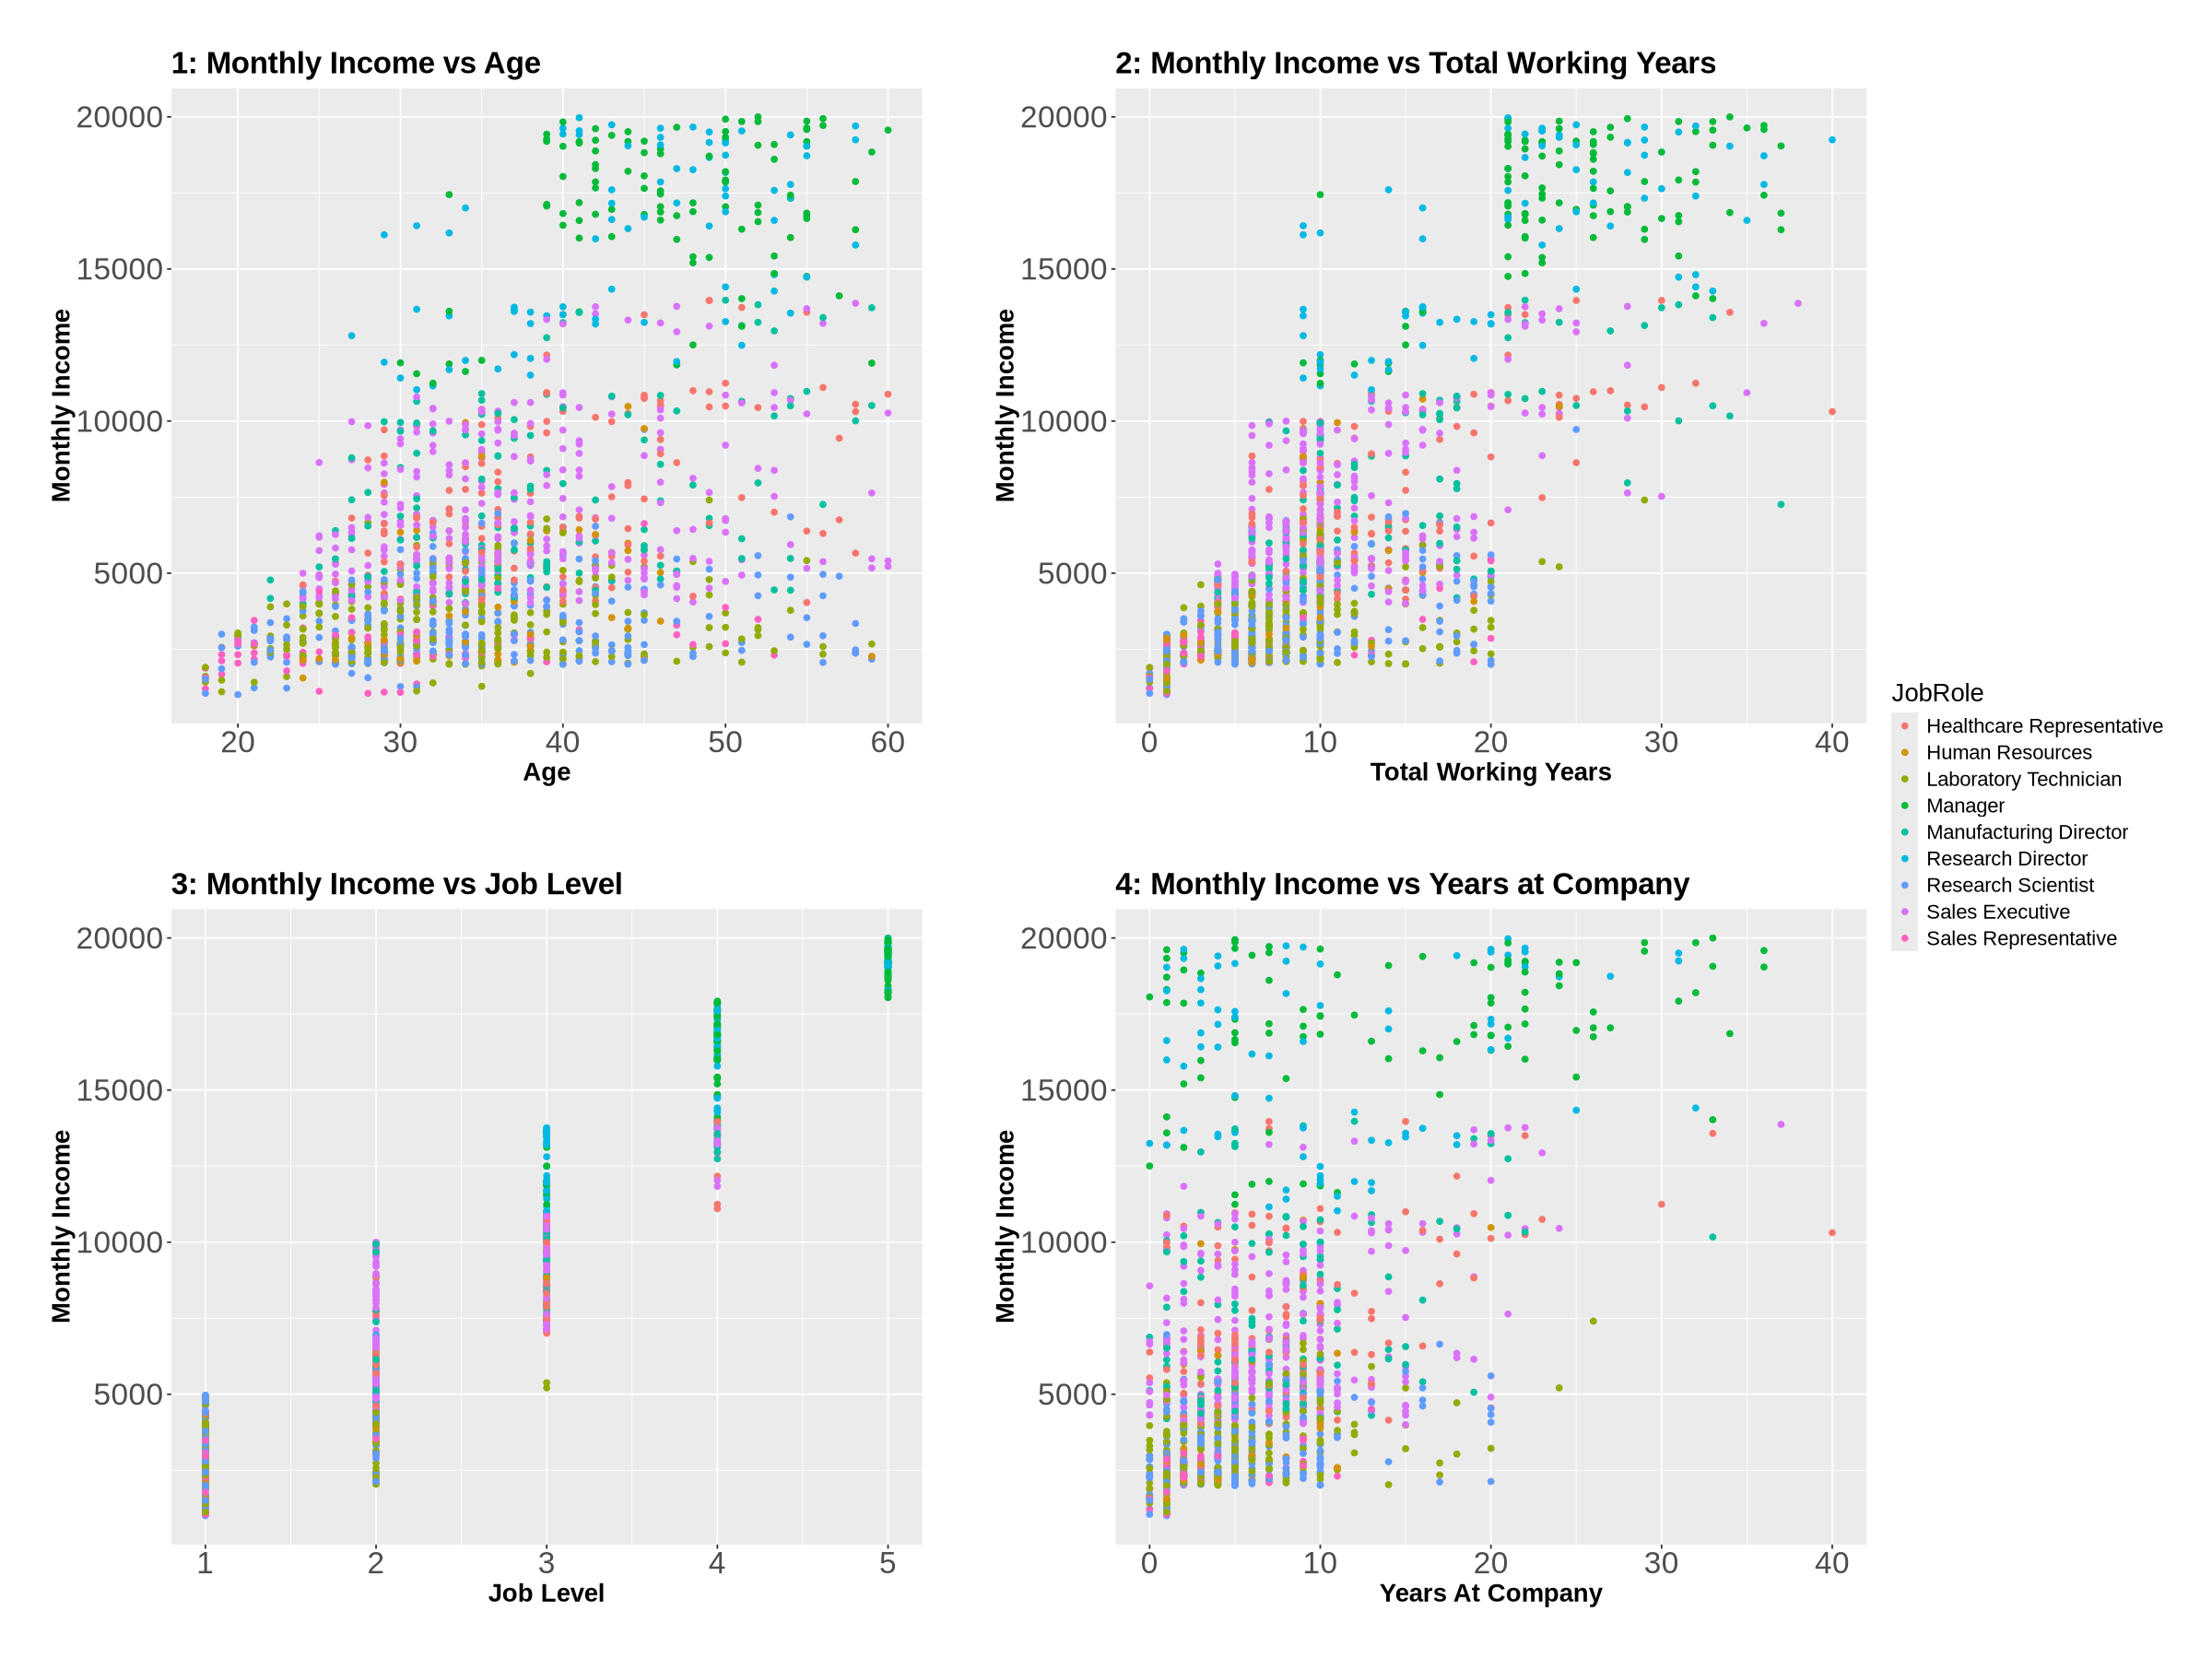

In [4]:
#Therefore, I plotted four scatterplots to better demonstrate their trends with the MonthlyIncome in different job roles. The results are shown below.
options(repr.plot.width = 20, repr.plot.height = 15)
theme <- theme(
  text = element_text(size = 16.5),
  plot.title = element_text(face = "bold"),
  axis.title = element_text(face = "bold"),
  axis.text = element_text(size = 20),
  plot.margin = margin(1, 0.7, 1, 1, "cm")
)

scatterplot1 <- ggplot(HR_data, aes(y = MonthlyIncome, x = Age, color = JobRole)) +
  geom_point() +
  xlab("Age") +
  ylab("Monthly Income") +
  ggtitle("1: Monthly Income vs Age") + 
  theme

scatterplot2 <- ggplot(HR_data, aes(y = MonthlyIncome, x = TotalWorkingYears, color = JobRole)) +
  geom_point() +
  xlab("Total Working Years") +
  ylab("Monthly Income") +
  ggtitle("2: Monthly Income vs Total Working Years") + 
  theme

scatterplot3 <- ggplot(HR_data, aes(y = MonthlyIncome, x = JobLevel, color = JobRole)) +
  geom_point() +
  xlab("Job Level") +
  ylab("Monthly Income") +
  ggtitle("3: Monthly Income vs Job Level") + 
  theme

scatterplot4 <- ggplot(HR_data, aes(y = MonthlyIncome, x = YearsAtCompany, color = JobRole)) +
  geom_point() +
  xlab("Years At Company") +
  ylab("Monthly Income") +
  ggtitle("4: Monthly Income vs Years at Company") +
  theme

combined_plot <- (scatterplot1 | scatterplot2) / 
                 (scatterplot3 | scatterplot4) + 
  plot_layout(guides = "collect")+  
  theme(legend.position = "bottom")  
combined_plot

### Figure 1. **Monthly Income vs Age**
  - I can use this scatterplot to help assess whether there is a relationship between an employee's age and their monthly income. Generally, it can show trends such as whether income tends to increase with age, reflecting factors like accumulated experience and seniority.
  - The plot can be used to identify if there is any point at which income plateaus or starts to decrease, which might reflect career stagnation or shifts in employee roles. I can explore if older employees consistently earn higher incomes or identify potential clusters/trends, such as whether a majority of employees below a certain age group have similar income levels.

### Figure 2. **Monthly Income vs Total Working Years**
  - This plot is about the relationship between the total number of years an employee has worked and their current monthly income. Total working years often correlate with an employee's expertise and position level.
  - By using this plot, I can determine if employees with more work experience generally earn more, which would indicate that experience plays a key role in salary growth. Outliers such as employees with many years of experience but relatively low income, could indicate underpayment or other factors limiting salary progression.

### Figure 3. **Monthly Income vs Job Level**
  - This scatterplot highlights the relationship between an employee's job level and their monthly income. Job level is a strong indicator of an employee's hierarchical position in the company, which directly influences their salary. Also allows me to evaluate how income levels are spread across different job levels and if higher job levels always lead to higher income.
  - Interestingly, job levels 4 and 5 are consistently earning more, it shows a well-defined progression in salary and may be worth to further investigating. Also, there exist many overlapping data points between lower and higher job levels, which might suggest that salary is not clearly based on hierarchy alone, meaning I can do a deeper exploration.

### Figure 4. **Monthly Income vs Years at Company**
  - This plot examines whether the number of years an employee has been with the company influences their monthly income. Longer years in a company could lead to salary raises and promotions, which reflect on monthly income. It's useful to understand if the company rewards loyalty. I also see a trend where income increases with years at the company, suggesting that employees are rewarded for their loyalty.


# Individual assignment 2： Methods and Plan

To restate my reasearch question: **Can we determine the monthly income of an employee based on certain characteristics of individuals at the company? If yes, can we quantify the relationship?** 

To address the question, I propose to use **Multiple Linear Regression (MLR)** as the method of analysis. 



## Why is this method appropriate?

MLR is is better for exploring relationships between a continuous dependent variable (Monthly Income) and multiple independent variables (Age, Job Level, Total Working Years, Years at Company, JobRole.).

A few other reasons why I would choose this method is that using MLR, it can calculate coefficients for each predictor, quantifying their effect on the dependent variable(Monthly Income). The results are also straightforward to interpret, making it easier to convey findings. Meanwhile, MLR allows us to test the statistical significance of predictors, identifying which characteristics significantly impact monthly income. 


## Which assumptions are required, if any, to apply the method selected?

Several assumptions must be made for MLR:

**Linearity:** The relationship between predictors and the outcome is linear.

**Independence:** Observations are independent of each other.

**Homoscedasticity:** The variance of residuals is constant across all levels of the predictors.

**Normality of Residuals:** The residuals are normally distributed.

**Absence of Multicollinearity:** Independent variables are not highly correlated with one another.

## What are the potential limitations or weaknesses of the method selected?

**Linearity** If relationships between predictors and monthly income are nonlinear, MLR may not fully capture these effects, requiring models like polynomial regression to further determine the relation.

**Collinearity Issues** If predictors are highly correlated (High VIF) and outliers, it could distort coefficient estimates.

**Confounding variables** Confounding variables that are not included in the dataset may also affect monthly income, potentially leading to bias.

**Sample Size** With a dataset of 1470 observations, while sufficient for MLR, overfitting may also occur if too many predictors are included without proper EDA.

## How to Implement 

**Step 1: Choose the right variables as predictors:** Clean data to handle missing values. Conduct forward/backward selection to include only relevant variables with meaningful correlations with monthly income.

**Step 2: MLR Model Building:** Fit an MLR model with selected predictors. Check assumptions by observing residual vs. fitted, Q-Q plot.

**Step 3: Refining Model:** Address multicollinearity using variance inflation factor (VIF) or by excluding problematic variables.

**Step 4: Validation:** Split data into training and testing sets for cross-validation. Evaluate model performance using metrics like R^2, adjusted R^2 and RMSE.

**Step 5: Interpretate findings:** Present coefficients, significance levels, and practical implications of the findings.

#  Individual assignment 2：Implementation of a proposed model


Call:
lm(formula = MonthlyIncome ~ Age + TotalWorkingYears + JobLevel + 
    JobRole + YearsAtCompany, data = HR_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3847.6  -693.8     6.7   658.3  4147.8 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    170.175    210.890   0.807 0.419834    
Age                             -3.721      4.493  -0.828 0.407679    
TotalWorkingYears               48.365      8.066   5.996 2.55e-09 ***
JobLevel                      2771.630     67.010  41.361  < 2e-16 ***
JobRoleHuman Resources        -283.483    191.787  -1.478 0.139593    
JobRoleLaboratory Technician  -594.315    137.836  -4.312 1.73e-05 ***
JobRoleManager                4118.845    178.144  23.121  < 2e-16 ***
JobRoleManufacturing Director -110.573    135.694  -0.815 0.415280    
JobRoleResearch Director      4012.395    179.788  22.317  < 2e-16 ***
JobRoleResearch Scientist     -490.085    136.949  -3.579 0.0

`geom_smooth()` using formula = 'y ~ x'


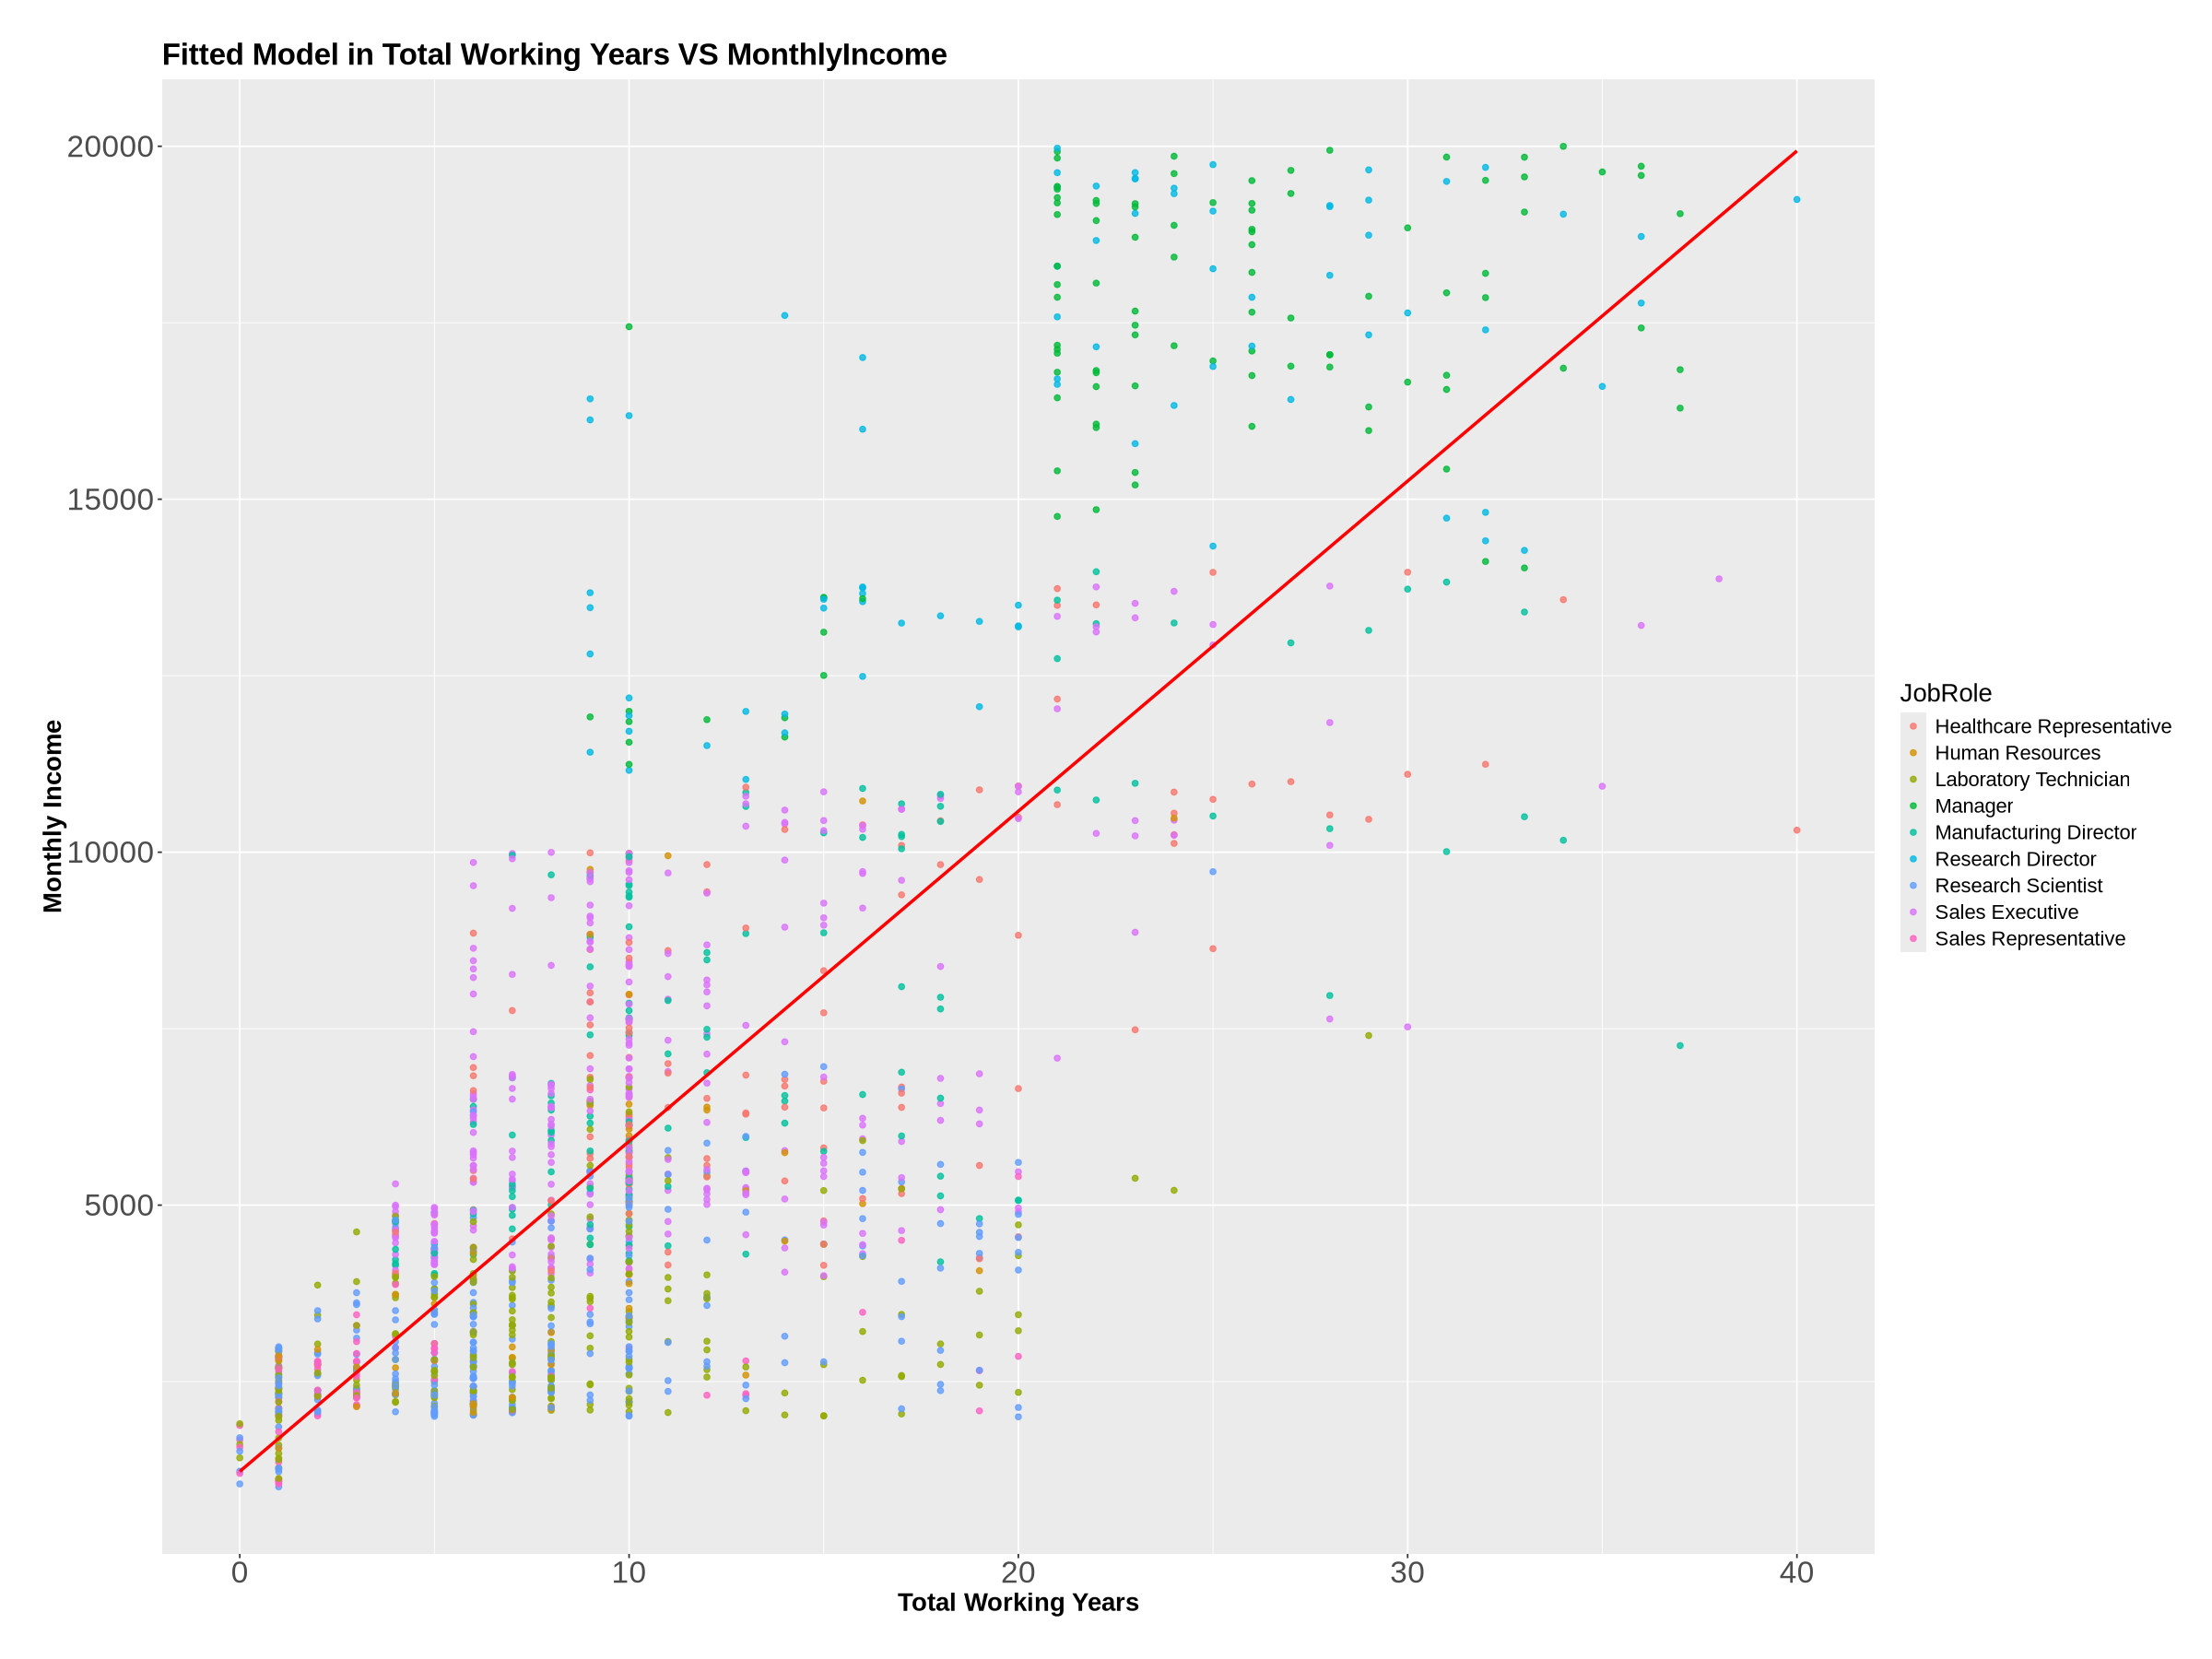

In [12]:
MLR_Model <- lm(MonthlyIncome ~ Age + TotalWorkingYears + JobLevel + JobRole + YearsAtCompany, data = HR_data)

summary(MLR_Model)
ggplot(HR_data, aes(x = TotalWorkingYears, y = MonthlyIncome, color = JobRole)) +
  geom_point(alpha = 0.8) +
  geom_smooth(method = "lm", color = "red", se = FALSE, size = 1) +
  labs(
    title = "Fitted Model in Total Working Years VS MonthlyIncome",
    x = "Total Working Years",
    y = "Monthly Income"
  ) + theme


## Brief interpretation

This model shows that **TotalWorkingYears**, **JobLevel**, and job roles like **Manager** and **Research Director** are significant predictors of monthly income with strong positive impacts. Job roles like **Laboratory Technician** and **Sales Representative** show significant negative  with income. The model explains 94.35% of the variance in monthly income (R^2 = 0.9435), indicating an excellent fit. The RSE of 1124 suggests a reasonably good prediction accuracy, making this model effective for addressing my research question of how employee characteristics influence monthly income.